In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

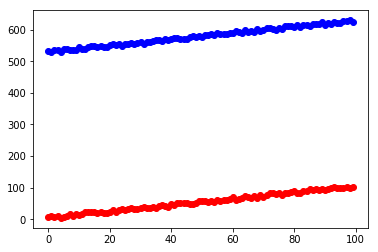

In [3]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape =numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = random.uniform(0,1)*variance +i
        x[i][1] = random.uniform(0,1)*variance +i
        x[i][2] = 1
        
        y[i] = (i+bias) + random.uniform(0,1)*variance + 500
    return x,y

x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")
plt.show()

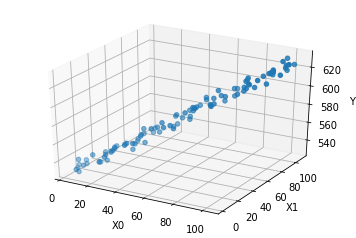

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("Y")

plt.show()

In [8]:
def compute_cost(x,y, theta):
    m= y.size
    predictions = x.dot(theta)
    sqErrors = (predictions - y)
    
    J = (1.0/ (2*m))*sqErrors.T.dot(sqErrors)
    return J

In [14]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:,i]
            errors_xi = (predictions-y)*partial_marginal
            theta[i] = theta[i] - alpha*(1.0/ m)*errors_xi.sum()
            
        if _ % 1000 ==0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x,y,theta))
            
    return theta, np.array(cost_history), np.array(theta_history)

In [15]:
theta_initial = np.ones(3)

theta, cost_history, theta_history= minimize_gradient(
    x,y, theta_initial, 300000, 0.0001
)
print("theta", theta)

theta [4.30995567e-01 5.66799268e-01 5.24662039e+02]


In [16]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2],y)

# coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [0.42156286 0.56563873]
Intercept:  525.4029449293945


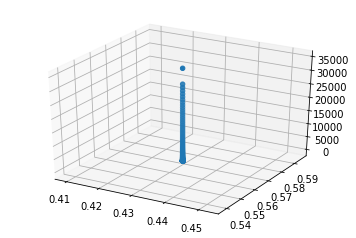

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(theta_history[:,0], theta_history[:,1], cost_history, zdir="z")

plt.show()

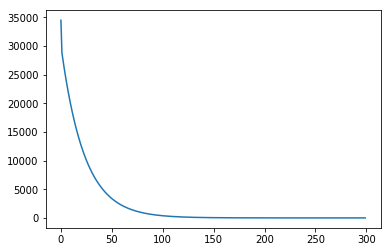

In [18]:
plt.plot(cost_history)
plt.show()